In this notebook, we let the reader listen to the sounds that the decoder has learned to generate from SIM's representations. We also interpolate between two representations (the user can also choose which two sounds to interpolate between). Finally, we let the reader listen to audio files that were obtained when only a small subset of the dimensions in the representation are beinig modifid. 

In [1]:
from demo_setup import setup_demo, print_z_names, get_two_zs, interpolate, plot, decode_and_listen, _get_data, \
    interpolate_partial

type = "SIM"  # SET VAL TO "GIM" OR "SIM" (my technique is SIM)
decoder = "MSE"  # SET VAL TO "MSE" OR "MSE+MEL" (MEL IS MORE ACCURATE FOR LISTENING, BUT MSE IS BETTER FOR VISUALIZATION IN PLOTS)

z_data, filenames, opt, context_model, decoder = setup_demo(type, decoder)

Let's use 1 GPUs!
Loading weights from  ./sim_logs//SIM=trueKLD=0.01
DataParallel(
  (module): FullModel(
    (fullmodel): ModuleList(
      (0): IndependentModule(
        (encoder): CNNEncoder(
          (encoder): Sequential(
            (layer 0): Sequential(
              (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), padding=(2,))
              (1): ReLU()
            )
            (layer 1): Sequential(
              (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), padding=(2,))
              (1): ReLU()
            )
          )
          (encoder_mu): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
          (encoder_var): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
        )
        (loss): InfoNCE_Loss(
          (predictor): Linear(in_features=512, out_features=6144, bias=False)
          (loss): LogSoftmax(dim=1)
        )
      )
      (1): IndependentModule(
        (encoder): CNNEncoder(
          (encoder): Sequential(
            (layer 0): Sequential(
  

In [2]:
print("Please choose two sounds to interpolate between:")
print_z_names(filenames)  # prints out the possible sounds to choose from

Please choose two sounds to interpolate between:
Idx: 0: babadu_1
Idx: 1: babagi_1
Idx: 2: babibi_1
Idx: 3: babibu_2
Idx: 4: babidi_2
Idx: 5: babiga_1
Idx: 6: babiga_2
Idx: 7: babugu_1
Idx: 8: badadi_1
Idx: 9: badidi_1
Idx: 10: badidu_1
Idx: 11: badiga_1
Idx: 12: bagaba_1
Idx: 13: bagabu_1
Idx: 14: bagada_1
Idx: 15: bagaga_1
Idx: 16: bagibi_1
Idx: 17: bagida_1
Idx: 18: bagidi_2
Idx: 19: bagubi_1
Idx: 20: bagubi_2
Idx: 21: baguda_1
Idx: 22: bagugu_1
Idx: 23: bibaba_1
Idx: 24: bibabu_1
Idx: 25: bibada_1
Idx: 26: bibadi_1
Idx: 27: bibibi_1
Idx: 28: bibibu_1
Idx: 29: bibida_1
Idx: 30: bibigu_1
Idx: 31: bibubi_2
Idx: 32: bibuda_1
Idx: 33: bibugu_1
Idx: 34: bidabi_1
Idx: 35: bidaga_1
Idx: 36: bididu_1
Idx: 37: bigabi_1
Idx: 38: bigadi_1
Idx: 39: bigaga_2
Idx: 40: bigagi_2
Idx: 41: bigidi_1
Idx: 42: bigigu_1
Idx: 43: bigubu_1
Idx: 44: biguda_1
Idx: 45: bubiba_1
Idx: 46: bubida_1
Idx: 47: bubidi_1
Idx: 48: bububa_1
Idx: 49: budabi_1
Idx: 50: budabu_1
Idx: 51: budada_1
Idx: 52: budagi_1
Idx: 53

In [3]:
sound_idx1 = 0  # babadu_1
sound_idx2 = 19  # bagubi_1

babadu_1 bagubi_1
Interpolating between bagubi_1 and babadu_1 (Because of fixed length cropping, the final syllable might be cut off
Interpolation 0


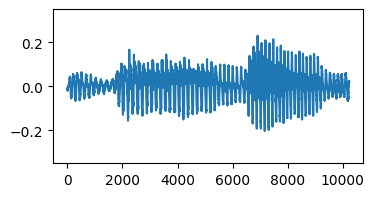

Interpolation 1


In [ ]:
z1, z2, z1_file, z2_file = get_two_zs(z_data, filenames, idx1=sound_idx1, idx2=sound_idx2)
interpolations = interpolate(z1, z2, 10)
print(
    f"Interpolating between {z2_file} and {z1_file} (Because of fixed length cropping, the final syllable might be cut off")

for i, z in enumerate(interpolations):
    print(f"Interpolation {i}")
    plot(z, opt, decoder)

In [ ]:
for i, z in enumerate(interpolations):
    print(f"Interpolation {i} [From {z2_file} to {z1_file}]")
    decode_and_listen(z, opt, decoder)

In [ ]:
nb_most_important_dims_to_use = 64  # value between 1 and 512. 512 is the full latent space, and hence all information is used

partial_interpolations = interpolate_partial(z1, z2, nb_most_important_dims_to_use, 10)
print(
    f"Interpolating between {z2_file} and {z1_file} but only changing the {nb_most_important_dims_to_use} most important dimensions")
print(
    f"Notice how SIM can the correctly create the sound 'bagu' by only modifying 64 dimensions, while GIM needs at least half to sound different from the starting sound")
for i, z in enumerate(partial_interpolations):
    print(f"Interpolation {i} [From {z2_file} to {z1_file}]")
    decode_and_listen(z, opt, decoder)

